In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df= pd.read_csv('exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
X = df.drop('math score', axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in'parental level of education' variable: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [8]:
y = df['math score']
y

0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', categorical_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
# Separate the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training


In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [15]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=False),
    'AdaBoostRegressor': AdaBoostRegressor(),
    }

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate the model
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print('MAE:', model_train_mae)
    print('MSE:', model_train_mse)
    print('RMSE:', model_train_rmse)
    print('R2:', model_train_r2)
    
    print("------------------------------------")
    
    print('Model Performance for Testing Set')
    print('MAE:', model_test_mae)
    print('MSE:', model_test_mse)
    print('RMSE:', model_test_rmse)
    print('R2:', model_test_r2)
    r2_list.append(model_test_r2)
    
    print("====================================")
    print('\n')

LinearRegression
Model Performance for Training Set
MAE: 4.3971875
MSE: 30.057869262695313
RMSE: 5.482505746708827
R2: 0.8718355401972542
------------------------------------
Model Performance for Testing Set
MAE: 4.073515625
MSE: 24.950689697265624
RMSE: 4.995066535819681
R2: 0.8869802096390504


Lasso
Model Performance for Training Set
MAE: 5.457572048868153
MSE: 45.16977368587781
RMSE: 6.720846203111466
R2: 0.8073995334377306
------------------------------------
Model Performance for Testing Set
MAE: 5.375728448586257
MSE: 46.36226661980758
RMSE: 6.808984257567906
R2: 0.7899916307883328


Ridge
Model Performance for Training Set
MAE: 4.3882894886296615
MSE: 29.94431309118887
RMSE: 5.472139717805903
R2: 0.8723197350432426
------------------------------------
Model Performance for Testing Set
MAE: 4.073221303785219
MSE: 24.873852996727933
RMSE: 4.987369346331584
R2: 0.8873282588469947


K-Neighbors Regressor
Model Performance for Training Set
MAE: 4.5365
MSE: 32.7507
RMSE: 5.722822730

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2']).sort_values('R2', ascending=False)

,Model,R2
2,Ridge,0.887328
0,LinearRegression,0.886980
7,CatBoostRegressor,0.874470
5,Random Forest Regressor,0.849917
8,AdaBoostRegressor,0.828253
6,XGBRegressor,0.826102
3,K-Neighbors Regressor,0.810209
1,Lasso,0.789992
4,Decision Tree Regressor,0.748849


## Linear Regression


In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.70


Text(0, 0.5, 'Predictions')

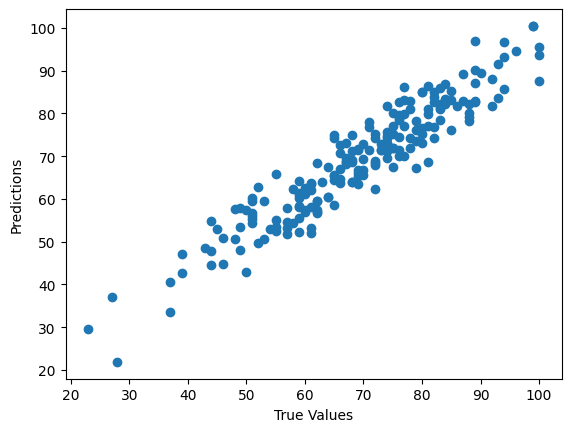

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

<Axes: xlabel='math score'>

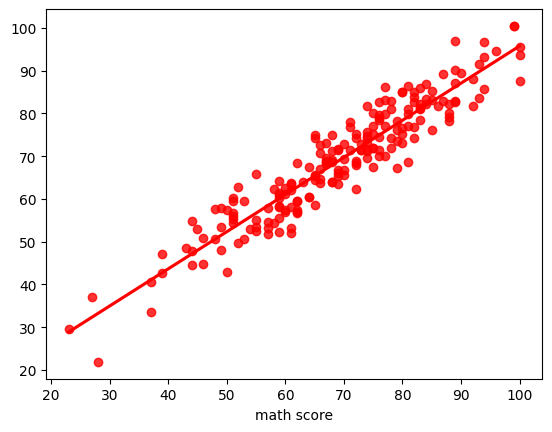

In [21]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="r")

In [23]:
pred_df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred, 'Difference': y_test - y_pred})
pred_df.sort_values('Difference', ascending=False)

,True Values,Predictions,Difference
408,100,87.515625,12.484375
820,81,68.625000,12.375000
559,79,67.171875,11.828125
312,92,81.781250,10.218750
247,88,78.156250,9.843750
...,...,...,...
947,65,74.875000,-9.875000
296,27,37.015625,-10.015625
63,55,65.750000,-10.750000
209,52,62.796875,-10.796875
